In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import cv2
import os
import scipy.signal as sigl 
import scipy.ndimage as ndi
import scipy.fft as fft
from PIL import Image

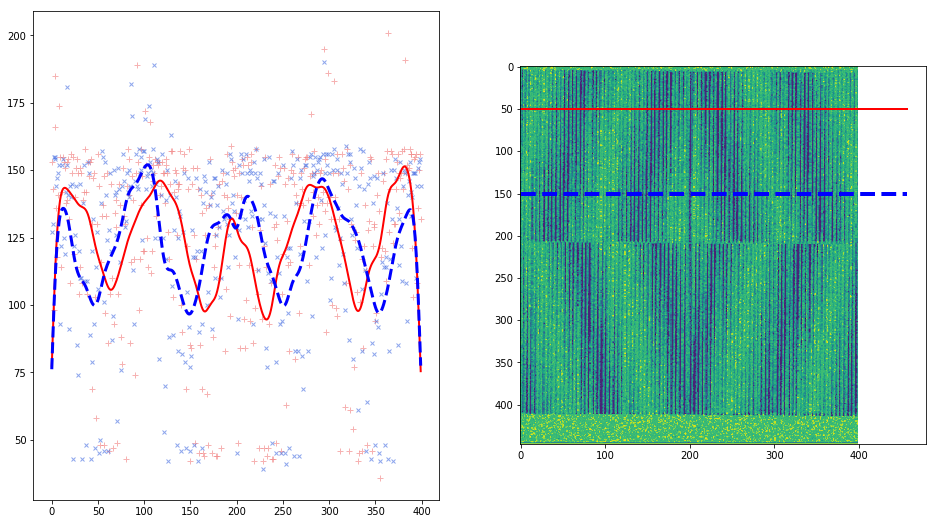

In [2]:
p1=4
p2=4.2
p_a=2*p1*p2/(p1+p2)
M=2*p_a/(p2-p1)
row1=50
row2=150
sigma=5.5
# read file
moire=cv2.imread('0.5_d.png',0)
shape=np.shape(moire)[0]
moire_new=moire[20:, 20:420]
# intensity of row

m_r1=moire_new[row1].astype(float)
m_r2=moire_new[row2].astype(float)

g_r1=ndi.gaussian_filter(m_r1,sigma,mode='constant',cval=0.0,truncate=4.0)
g_r2=ndi.gaussian_filter(m_r2,sigma,mode='constant',cval=0.0,truncate=4.0)
#find peak
peak_r1=sigl.find_peaks(g_r1,height=125,distance=20)[0]
peak_r2=sigl.find_peaks(g_r2,height=125,distance=20)[0]


plt.figure(figsize=(16,9))
plt.subplot(121)
r=np.arange(0,len(m_r1),1)
plt.plot(r,m_r1,'+', color='lightcoral',ms=6,alpha=0.6)
plt.plot(r,m_r2,'x', color='royalblue',ms=4,alpha=0.6)
plt.plot(r,g_r1,'-', color='red',lw=2)
plt.plot(r,g_r2,'--', color='blue',lw=3)
plt.subplot(122)
plt.imshow(moire_new, cmap='viridis')
plt.plot([0,shape-10], [row1,row1], '-', color='red',lw=2)
plt.plot([0,shape-10], [row2,row2], '--', color='blue',lw=4)


/Users/chunglee_people/anaconda3/envs/py36_opencv/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[array([116, 284, 386]), array([ 95, 200, 302])]


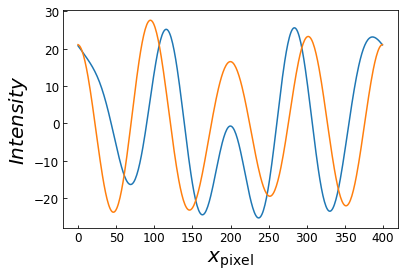

In [3]:
row1=50
row2=150
moire=cv2.imread('0.5_d.png',0)
shape=np.shape(moire)[0]
moire_new=moire[20:, 20:420]
# intensity of row
m_r1=moire_new[row1].astype(float)
m_r2=moire_new[row2].astype(float)
pix=8
lens=10
thre=6
def peak(y1):
    y1b=y1[:400]-y1[:400].mean()
    moire_fft=fft.fft(y1b)
    moire_fft2 = moire_fft.copy()
    moire_fft2[thre:-thre]=0
    moire_ifft = fft.ifft(moire_fft2)
    plt.plot(moire_ifft)

    plt.xlabel("$x_\mathrm{pixel}$",fontsize=20)
    plt.ylabel("$Intensity$",fontsize=20)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tick_params('both',direction='in')

    peak_ifft1=sigl.find_peaks(moire_ifft,height=10,distance=50)[0]
    return(peak_ifft1,moire_ifft)
hs=[]
for i in (m_r1,m_r2):
    hs.append(peak(i)[0])
print(hs)



[ 3.992  7.974 11.937 15.871 19.769 23.62  27.419 31.157 34.828 38.427]
[ 4.009  8.007 11.843 15.934 19.84  23.709 27.301 31.017 34.908 38.322]
[ 0.017  0.033 -0.094  0.063  0.071  0.089 -0.118 -0.14   0.08  -0.105]


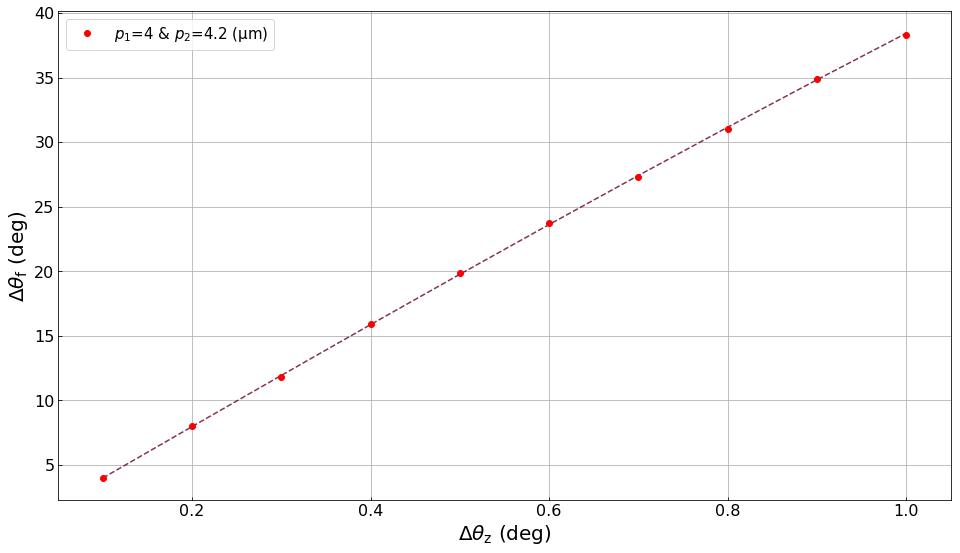

In [7]:
plt.figure(figsize=(16,9))
i_count=np.arange(0.1,1.1,0.1)
R_ideal=np.array([3.992,7.974,11.937,15.871,19.769,\
               23.620,27.419,31.157,34.828,38.427])
R_simulate=np.array([4.009,8.007,11.843,15.934,19.84,\
                    23.709,27.301,31.017,34.908,38.322])
R_error=R_simulate-R_ideal
R_error_abs=abs(R_error)
print(R_ideal)
print(R_simulate)
print(R_error)
plt.xlim(0.05,1.05)
plt.xlabel("$Δθ_\mathrm{z}$ (deg)",fontsize=20)
plt.ylabel("$Δθ_\mathrm{f}$ (deg)",fontsize=20)
plt.plot(i_count,R_ideal,'--',color='#660022',alpha=0.8)
plt.plot(i_count,R_simulate,'ro',label='$p_\mathrm{1}$=4 & $p_\mathrm{2}$=4.2 (µm)')



plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper left',fontsize=15)
plt.grid(True)

# hist.xaxis.set_tick_params(direction='in')
plt.tick_params('both',direction='in')

In [8]:

print(np.sum(R_error_abs)/len(R_error_abs))

0.0809999999999996


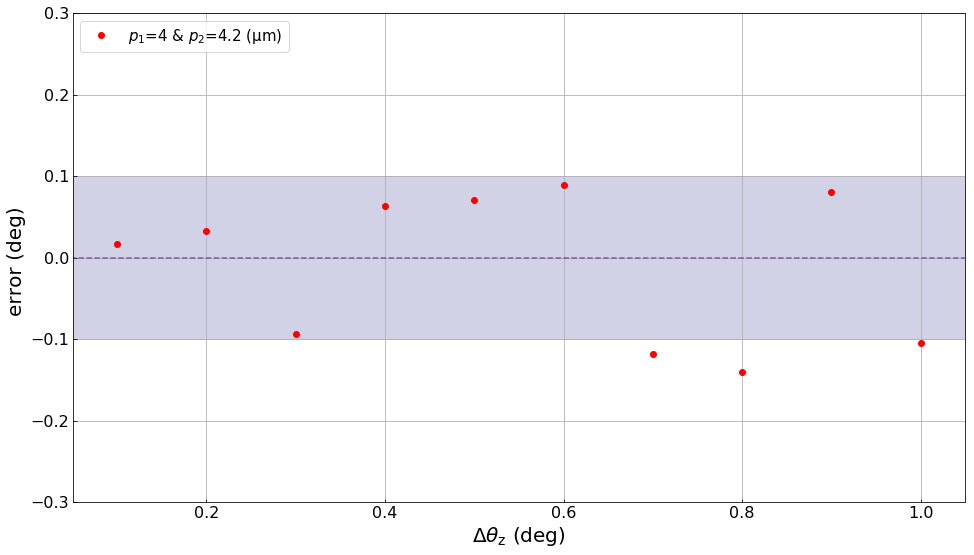

In [9]:
plt.figure(figsize=(16,9))
plt.ylim(-0.3,0.3)
plt.xlim(0.05,1.05)
plt.fill_between([-10,10],[0.1,0.1],[-0.1,-0.1],color='#222288',alpha=0.2)
plt.plot([-10,10],[0,0],'--',color='#7733AA',alpha=0.8)
plt.xlabel("$Δθ_\mathrm{z}$ (deg)",fontsize=20)
plt.ylabel("error (deg) ",fontsize=20)
plt.plot(i_count,R_error,'ro',label='$p_\mathrm{1}$=4 & $p_\mathrm{2}$=4.2 (µm)')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper left',fontsize=15)

plt.grid(True)

# hist.xaxis.set_tick_params(direction='in')
plt.tick_params('both',direction='in')


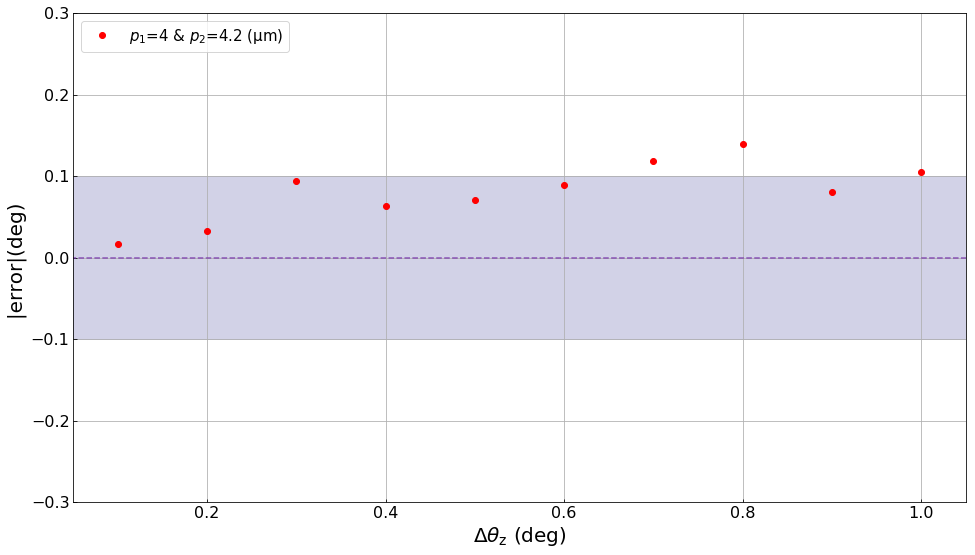

In [10]:
plt.figure(figsize=(16,9))
plt.ylim(-0.3,0.3)
plt.xlim(0.05,1.05)
plt.fill_between([-10,10],[0.1,0.1],[-0.1,-0.1],color='#222288',alpha=0.2)
plt.plot([-10,10],[0,0],'--',color='#7733AA',alpha=0.8)
plt.xlabel("$Δθ_\mathrm{z}$ (deg)",fontsize=20)
plt.ylabel("|error|(deg) ",fontsize=20)
plt.plot(i_count,R_error_abs,'ro',label='$p_\mathrm{1}$=4 & $p_\mathrm{2}$=4.2 (µm)')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper left',fontsize=15)
plt.grid(True)

# hist.xaxis.set_tick_params(direction='in')
plt.tick_params('both',direction='in')